In [47]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg as LA
import matplotlib

wlacznik = 1

N = 1000
zmax = 250
hc = 197.326968
mc2 = 0.51099
ef = 0.1
m_eff = 0.92
z0 = 125
za = 75
zb = 175
zpacz = 750
V0 = -200

h = zmax/N
psi = np.zeros(N+1)
psi[N] = 0
psi[N-1]= 0.00001
psi[0] = 0
psi[1] = 0.00001
P = 0
L = 0
delta = 0.01
Ewlasne = np.empty(100)

def pole(z):
    if wlacznik == 0:
        if(z<za):
            return 0
        elif z>=za and z<= zb:
            return V0
        elif z>zb:
            return 0
    if wlacznik == 1:
        if z<za:
            return -ef*(z-z0)
        elif z>=za and z<=zb:
            return V0-ef*(z-z0)
        elif z>zb:
            return -ef*(z-z0)

def k_2(z, energia):
    return 2*mc2*m_eff/hc/hc*10*(energia-pole(z))

def numerow1(i, energia):
    return 2*(1-(5/12)*h*h*k_2(i*h, energia))

def numerow2(i, energia):
    return 1+(1/12)*h*h*k_2(i*h, energia)

def numerow(energia):
    global L
    for i in range(2, zpacz+1):
        mianownik = numerow2(i, energia)
        psi[i] = (numerow1(i-1, energia)*psi[i-1]-numerow2(i-2, energia)*psi[i-2])/mianownik
        if i == zpacz:
            P = psi[i]    
    for i in range(N-2, zpacz+1, -1):
        psi[i] = (numerow1(i+1, energia)*psi[i+1]-numerow2(i+2, energia)*psi[i+2])/numerow2(i,energia)
        if i == zpacz:
            L = psi[i]            
    return P-L

def Emax():
    if wlacznik == 0:
        return 0
    else:
        return ef*(zb-z0)

n_steps = (Emax()+1 -(V0))/delta
energy_range = np.linspace(V0, Emax()+1, int(n_steps))

def algorytm(Ewlasne):
    ilosc_wartosci = 0
    licznik = 0
    check = 0
    
    sprawdz1 = sprawdz2 = sprawdz3 = 0
    
    for energia in energy_range:
        check +=1
        brak = numerow(energia)
        n_steps_tmp = (energia-(energia-delta))/0.000001
        tmp_range = np.linspace(energia-delta, energia, int(n_steps_tmp))
        
        if energia != V0:
            if brak*sprawdz1 < 0:
                for tmp in tmp_range:
                    sprawdz2 = numerow(tmp)
                    if tmp!=(energia-delta):
                        if sprawdz2*sprawdz3 <0:
                            licznik +=1
                            if licznik ==1:
                                if wlacznik ==0:
                                    print("bez pola E")
                                else:
                                    print("pole E = ")
                                    print(tmp)
                            sprawdz3 = sprawdz2
                Ewlasne[ilosc_wartosci] = tmp
                ilosc_wartosci+=1
            
            
            sprawdz1 = brak
#         print(check)
    return ilosc_wartosci
    
I = np.arange(0, N)*h
PSI = []
TMP = algorytm(Ewlasne)
for j in range(0, TMP):
    numerow(Ewlasne[j])
    PSI.append(psi.copy())

[  0.00000000e+00   1.00000000e-05   2.00075905e-05 ...,   2.00038261e-05
   1.00000000e-05   0.00000000e+00]


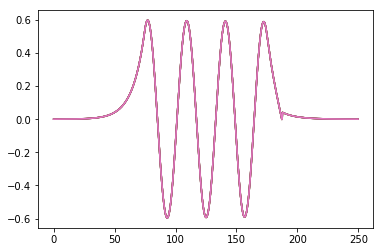

In [50]:
print(psi)
for psi_z_PSI in PSI: 
    plt.plot(I, psi_z_PSI[1:])
plt.show()